In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Netflix Data Cleaning, Analysis and Visualization

This project cleans and analyzes a Netflix movies and TV shows dataset to explore content distribution, trends, genres, and countries through exploratory data analysis and visualizations.

## Project Objectives

- Clean and preprocess the Netflix dataset for analysis.

- Analyze the distribution and growth of movies and TV shows over time.

- Identify key countries, genres, and content trends using visualizations.

## Dataset Description

The dataset is a CSV of Netflix titles with metadata such as type, title, director, cast, country, date added, release year, rating, duration, and genres.

In [3]:
df = pd.read_csv('../data/netflix1.csv')

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


### Data Cleaning

In this step, missing values were handled, duplicate records were removed, and date/time columns were converted
to correct format to enable time-based analysis.

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['director'] = df['director'].fillna('Not Available')
df['country']  = df['country'].fillna('Unknown')
df['rating']   = df['rating'].fillna('Not Rated') 

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [9]:
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit']  = df['duration'].str.extract('([A-Za-z]+)').fillna('Unknown') 

In [10]:
df.isnull().sum() 

show_id           0
type              0
title             0
director          0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
year_added        0
duration_value    0
duration_unit     0
dtype: int64

## Visualization Settings

To maintain a professional and consistent look across all charts, we apply a common visualization theme
(using Seaborn + Matplotlib settings). This ensures clean graphs with readable labels and a uniform style.


In [11]:
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

## Movies vs TV Shows Analysis

This section compares the number of movies and TV shows available on Netflix.

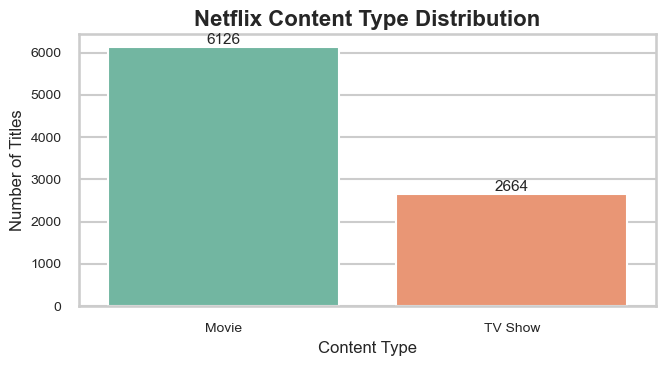

In [13]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x="type", hue="type", data=df, palette="Set2", legend=False) 

for container in ax.containers:
    ax.bar_label(container, fontsize=11)

plt.title("Netflix Content Type Distribution", weight="bold")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.savefig("../images/01_movies_vs_tvshows.png", dpi=300, bbox_inches="tight")
plt.show()


**Insight:** Netflix has more Movies than TV Shows, showing stronger focus on single-watch content.


## Content Added Over the Years

This analysis shows how Netflix content has grown over time.

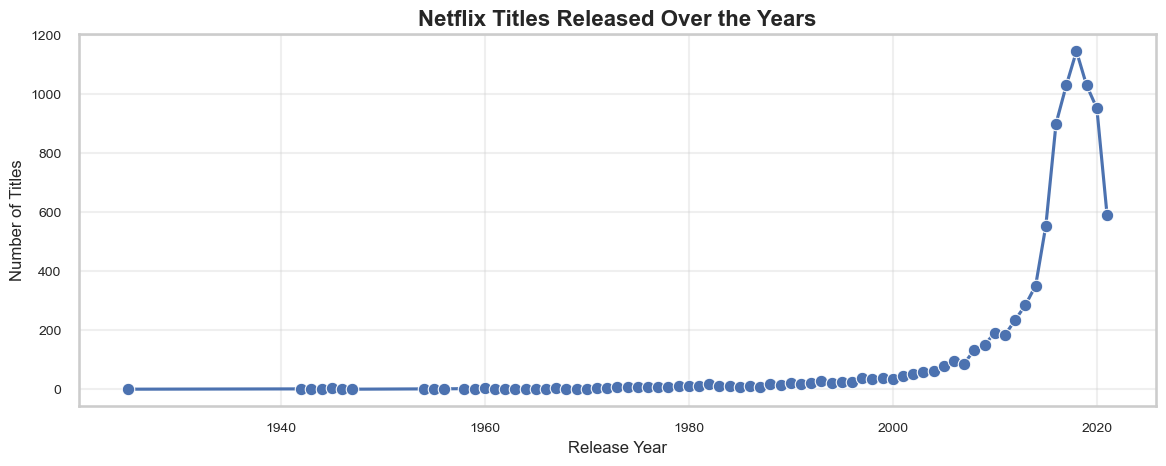

In [14]:
year_counts = df["release_year"].value_counts().sort_index()

plt.figure(figsize=(12,5))
ax = sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")

plt.title("Netflix Titles Released Over the Years", weight="bold")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("../images/02_release_trend.png", dpi=300, bbox_inches="tight")
plt.show() 

**Insight:** Netflix content release increased significantly after 2015, indicating rapid platform expansion.


## Top Content Producing Countries

This section identifies the countries contributing the most content to Netflix.

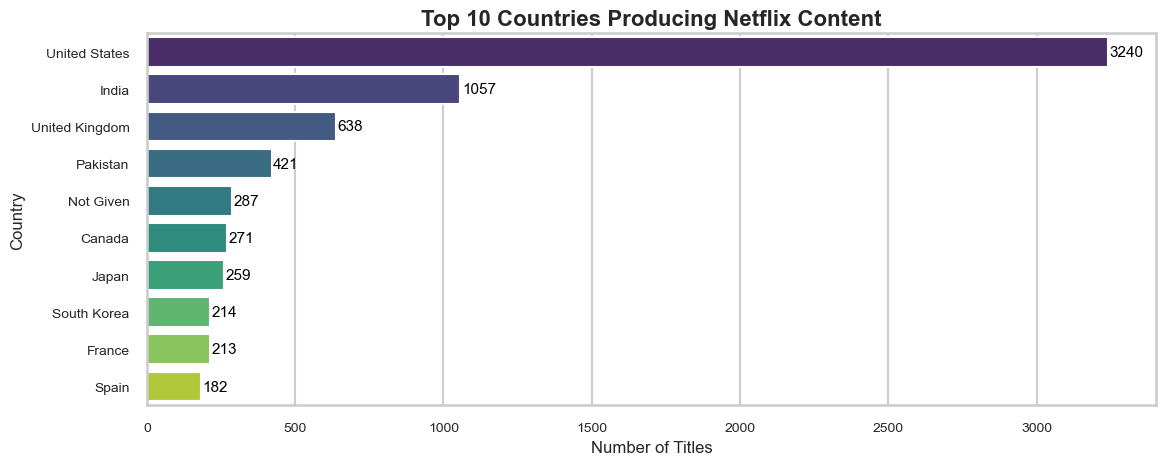

In [16]:
top_countries = df["country"].value_counts().head(10)

plt.figure(figsize=(12,5))
ax = sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,
    palette="viridis",
    legend=False)

for i, v in enumerate(top_countries.values):
    ax.text(v + 5, i, str(v), color="black", va="center", fontsize=11)

plt.title("Top 10 Countries Producing Netflix Content", weight="bold")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("../images/03_top_countries.png", dpi=300, bbox_inches="tight")
plt.show()


**Insight:** The United States and India contribute the most Netflix content, highlighting their dominance in global entertainment production.

## Ratings Distribution



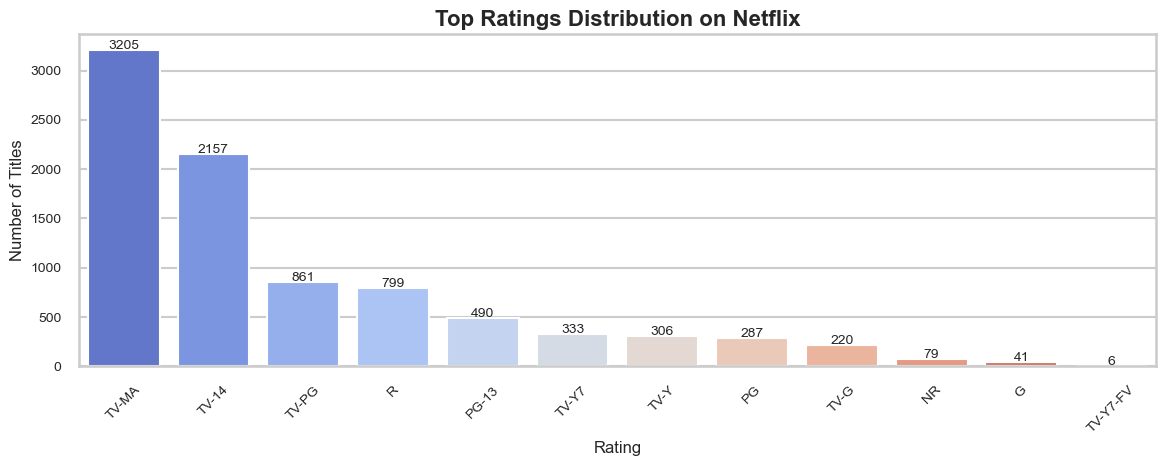

In [18]:
rating_counts = df["rating"].value_counts().head(12)

plt.figure(figsize=(12,5))
ax = sns.barplot(
    x=rating_counts.index,
    y=rating_counts.values,
    hue=rating_counts.index,
    palette="coolwarm",
    legend=False)

for i, v in enumerate(rating_counts.values):
    ax.text(i, v + 10, str(v), ha="center", fontsize=10)

plt.title("Top Ratings Distribution on Netflix", weight="bold")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../images/04_ratings_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


**Insight:** Mature ratings such as TV-MA and TV-14 dominate Netflix, showing the platform targets mostly teen and adult viewers.


## Top 10 Genres



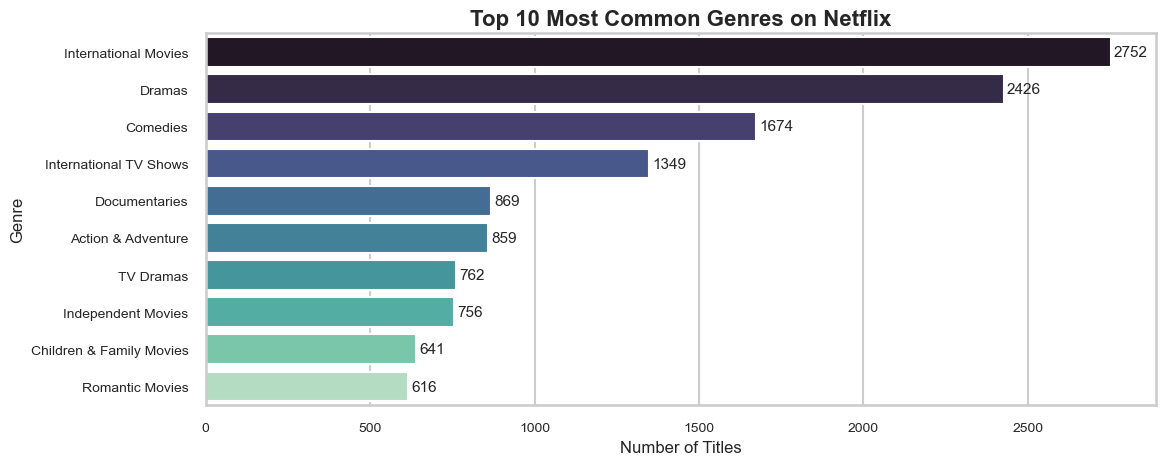

In [24]:
genres = df["listed_in"].str.split(", ").explode()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(12,5))

ax = sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    hue=top_genres.index,    
    palette="mako",
    legend=False)

for i, v in enumerate(top_genres.values):
    ax.text(v + 10, i, str(v), va="center", fontsize=11)

plt.title("Top 10 Most Common Genres on Netflix", weight="bold")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.savefig("../images/05_top_genres.png", dpi=300, bbox_inches="tight")
plt.show()


**Insight:** International Movies, Dramas, and Comedies dominate Netflix’s catalog, showing Netflix prioritizes globally appealing and widely consumed genres.


## Movie Duration Distribution

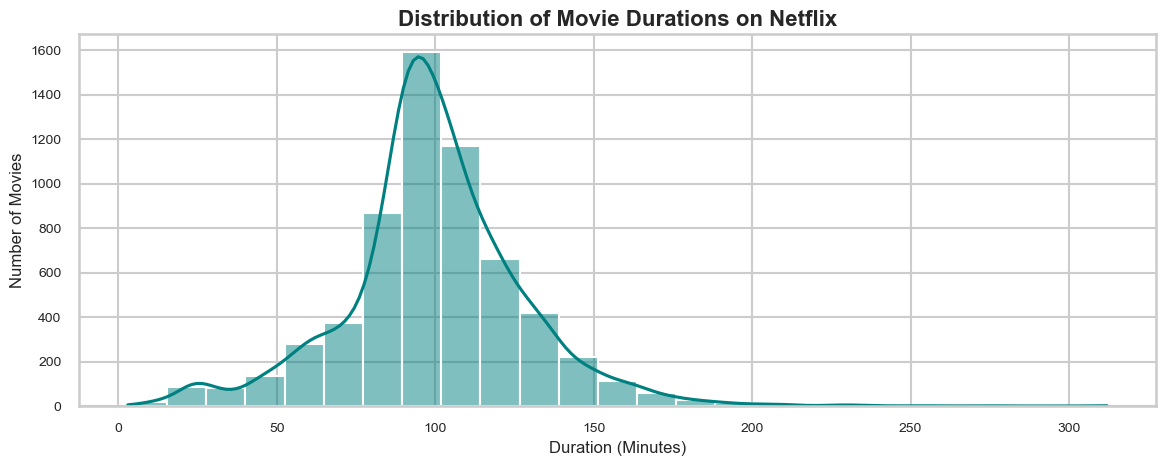

In [25]:
df_movies = df[df["type"] == "Movie"].copy()
df_movies["duration_minutes"] = df_movies["duration"].str.extract("(\d+)").astype(float)

plt.figure(figsize=(12,5))
sns.histplot(df_movies["duration_minutes"], bins=25, kde=True, color="teal")

plt.title("Distribution of Movie Durations on Netflix", weight="bold")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig("../images/06_movie_duration.png", dpi=300, bbox_inches="tight")
plt.show()


**Insight:** Most movies fall between 80–120 minutes, matching standard movie viewing preferences.


## Movies vs TV shows trend

<Figure size 1200x500 with 0 Axes>

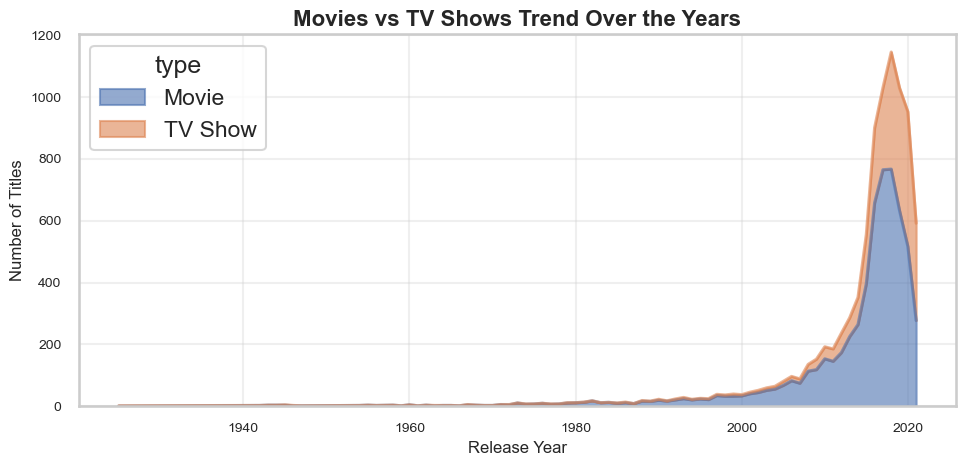

In [26]:
trend = df.groupby(["release_year", "type"]).size().unstack().fillna(0)

plt.figure(figsize=(12,5))
trend.plot(kind="area", alpha=0.6)

plt.title("Movies vs TV Shows Trend Over the Years", weight="bold")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("../images/07_movies_tv_trend.png", dpi=300, bbox_inches="tight")
plt.show()


**Insight:** Movies remain dominant, but TV Shows show steady growth indicating increasing demand for episodic content.


## India-Specific Analysis

This section focuses on Netflix titles produced in India to understand content distribution, popular genres,
and rating patterns specific to the Indian catalog.


In [27]:
india_df = df[df["country"].str.contains("India", na=False)]

print("Total India Titles:", india_df.shape[0])
india_df["type"].value_counts()


Total India Titles: 1057


type
Movie      976
TV Show     81
Name: count, dtype: int64

## India Movies vs TV Shows

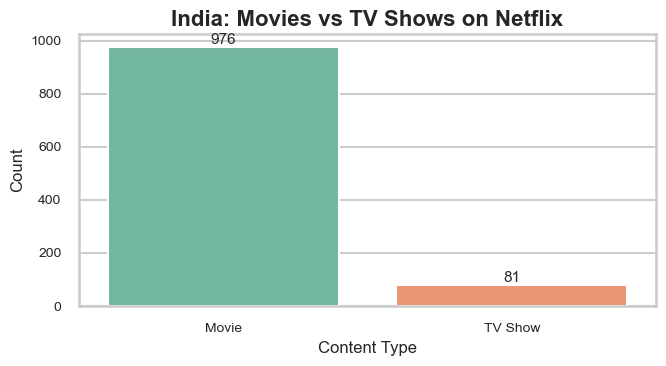

In [28]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x="type", hue="type", data=india_df, palette="Set2", legend=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=11)

plt.title("India: Movies vs TV Shows on Netflix", weight="bold")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../images/08_india_movies_vs_tvshows.png", dpi=300, bbox_inches="tight")
plt.show()


**Insight:** Indian Netflix content includes more Movies than TV Shows, showing stronger focus on film-based entertainment.


## Challenges Faced

During this analysis, the following challenges were encountered:

- Missing values in columns such as `director`, `country`, and `rating`, which required careful handling.
- The `date_added` column was not in datetime format, so it had to be converted for time-based trends.
- Some titles contained multiple countries/genres in a single field, so splitting and exploding was required.
- The `duration` column had mixed formats (minutes for Movies and seasons for TV Shows), so additional cleaning was needed to extract numeric values.


## Conclusion

From the Netflix dataset analysis, the following conclusions were drawn:
- Netflix has more Movies than TV Shows, indicating a strong focus on single-watch content.
- Content production increased significantly after 2015, showing rapid platform expansion.
- The United States and India are top contributors to Netflix content.
- Mature ratings such as TV-MA and TV-14 dominate the platform.
- Genres like International Movies, Dramas, and Comedies are the most common across Netflix titles.
